<a href="https://colab.research.google.com/github/Aghareed-6/week2t5test/blob/main/Weekly_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Weekly Project 2!

## Introduction to Road Traffic Accidents (RTA) Dataset

### Dataset Overview
The RTA Dataset provides a detailed snapshot of road traffic accidents, capturing a range of data from accident conditions to casualty details. This dataset is essential for analyzing patterns and causes of accidents to improve road safety.

### Data Characteristics
- **Entries**: The dataset contains 12,316 entries.
- **Features**: There are 32 features in the dataset, which include:
  - `Time`: Time when the accident occurred.
  - `Day_of_week`: Day of the week.
  - `Age_band_of_driver`: Age group of the driver involved.
  - `Sex_of_driver`: Gender of the driver.
  - `Educational_level`: Educational level of the driver.
  - `Type_of_vehicle`: Type of vehicle involved in the accident.
  - `Cause_of_accident`: Reported cause of the accident.
  - `Accident_severity`: Severity of the accident.
- **Target Column**: `Accident_severity` is used as the target column for modeling. This feature classifies the severity of each accident.

### Objective
Students will use this dataset to apply various data visualization, modeling, and evaluation techniques learned in class. The primary goal is to build models that can accurately predict the severity of accidents and to identify the key factors that contribute to severe accidents.

## Import Libraries
Import all the necessary libraries here. Include libraries for handling data (like pandas), visualization (like matplotlib and seaborn), and modeling (like scikit-learn).

In [80]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectPercentile, chi2


## Load Data
Load the dataset from the provided CSV file into a DataFrame.

In [4]:
df=pd.read_csv('/content/RTA_Dataset.csv')
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [7]:
df.isnull().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,741
Vehicle_driver_relation,579
Driving_experience,829
Type_of_vehicle,950
Owner_of_vehicle,482
Service_year_of_vehicle,3928


In [9]:
df.drop(columns=['Service_year_of_vehicle','Defect_of_vehicle','Fitness_of_casuality','Work_of_casuality'], inplace=True)

df['Educational_level'] = df['Educational_level'].fillna(df['Educational_level'].mode()[0])
df['Vehicle_driver_relation'] = df['Vehicle_driver_relation'].fillna(df['Vehicle_driver_relation'].mode()[0])
df['Driving_experience'] = df['Driving_experience'].fillna(df['Driving_experience'].mode()[0])
df['Type_of_vehicle'] = df['Type_of_vehicle'].fillna(df['Type_of_vehicle'].mode()[0])
df['Owner_of_vehicle'] = df['Owner_of_vehicle'].fillna(df['Owner_of_vehicle'].mode()[0])
df['Area_accident_occured'] = df['Area_accident_occured'].fillna(df['Area_accident_occured'].mode()[0])
df['Lanes_or_Medians'] = df['Lanes_or_Medians'].fillna(df['Lanes_or_Medians'].mode()[0])
df['Road_allignment'] = df['Road_allignment'].fillna(df['Road_allignment'].mode()[0])
df['Types_of_Junction'] = df['Types_of_Junction'].fillna(df['Types_of_Junction'].mode()[0])
df['Road_surface_type'] = df['Road_surface_type'].fillna(df['Road_surface_type'].mode()[0])
df['Type_of_collision'] = df['Type_of_collision'].fillna(df['Type_of_collision'].mode()[0])
df['Vehicle_movement'] = df['Vehicle_movement'].fillna(df['Vehicle_movement'].mode()[0])


In [12]:
df.isnull().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,0
Vehicle_driver_relation,0
Driving_experience,0
Type_of_vehicle,0
Owner_of_vehicle,0
Area_accident_occured,0


In [14]:
display(df.describe())

display(df.shape)

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


(12316, 28)

In [16]:
df.shape

(12316, 28)

In [18]:
duplicated_rows=df.duplicated()
df

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,...,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Residential areas,...,2,2,Going straight,na,na,na,na,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,Office areas,...,2,2,Going straight,na,na,na,na,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Recreational areas,...,2,2,Going straight,Driver or rider,Male,31-50,3,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Office areas,...,2,2,Going straight,Pedestrian,Female,18-30,3,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Owner,Industrial areas,...,2,2,Going straight,na,na,na,na,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,Junior high school,Employee,2-5yr,Lorry (11?40Q),Owner,Outside rural areas,...,2,1,Going straight,na,na,na,na,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,Outside rural areas,...,2,1,Other,na,na,na,na,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,Outside rural areas,...,1,1,Other,Driver or rider,Male,31-50,3,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,Office areas,...,2,1,Other,na,na,na,na,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [19]:
df.dtypes

,0
Time,object
Day_of_week,object
Age_band_of_driver,object
Sex_of_driver,object
Educational_level,object
Vehicle_driver_relation,object
Driving_experience,object
Type_of_vehicle,object
Owner_of_vehicle,object
Area_accident_occured,object


## Data Preprocessing
Data preprocessing is essential for transforming raw data into a format suitable for further analysis and modeling. Follow these steps to ensure your data is ready for predictive modeling or advanced analytics:
- **Handling Missing Values**: Replace missing values with appropriate statistics (mean, median, mode) or use more complex imputation techniques.
- **Normalization/Scaling**: Scale data to a small, specified range like 0 to 1, or transform it to have a mean of zero and a standard deviation of one.
- **Label Encoding**: Convert categorical text data into model-understandable numbers where the labels are ordered.
- **One-Hot Encoding**: Use for nominal categorical data where no ordinal relationship exists to transform the data into a binary column for each category. (Be careful not to increase the dimensionality significantly)
- **Detection and Treatment of Outliers**: Use statistical tests, box plots, or scatter plots to identify outliers and then cap, trim, or use robust methods to reduce the effect of outliers, depending on the context.
- **Feature Engineering**: Enhance your dataset by creating new features and transforming existing ones. This might involve combining data from different columns, applying transformations, or reducing dimensionality with techniques like PCA to improve model performance.

Consider these steps as a foundation, and feel free to introduce additional preprocessing techniques as needed to address specific characteristics of your dataset.

In [28]:
display(df.isna().sum())

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,0
Vehicle_driver_relation,0
Driving_experience,0
Type_of_vehicle,0
Owner_of_vehicle,0
Area_accident_occured,0


In [40]:
from sklearn.preprocessing import StandardScaler

In [45]:
SS=StandardScaler()
df['Number_of_vehicles_involved']=SS.fit_transform(df[['Number_of_vehicles_involved']])
df['Number_of_casualties']=SS.fit_transform(df[['Number_of_casualties']])
for i in df.select_dtypes (include='object').columns:
  display(df[i].value_counts())
  print("-"*50)
  df['Age_band_of_casualty']=df['Age_band_of_casualty'].apply(lambda x:'Under 18' if x=='5' else x)

,count
Time,
15:30:00,120
17:10:00,110
18:30:00,103
11:30:00,99
17:00:00,98
16:00:00,97
18:00:00,95
19:00:00,94
17:50:00,88


--------------------------------------------------


,count
Day_of_week,
Friday,2041
Thursday,1851
Wednesday,1840
Tuesday,1770
Monday,1681
Saturday,1666
Sunday,1467


--------------------------------------------------


,count
Age_band_of_driver,
18-30,4271
31-50,4087
Over 51,1585
Unknown,1548
Under 18,825


--------------------------------------------------


,count
Sex_of_driver,
Male,11437
Female,701
Unknown,178


--------------------------------------------------


,count
Educational_level,
Junior high school,8360
Elementary school,2163
High school,1110
Above high school,362
Writing & reading,176
Unknown,100
Illiterate,45


--------------------------------------------------


,count
Vehicle_driver_relation,
Employee,10206
Owner,1973
Other,123
Unknown,14


--------------------------------------------------


,count
Driving_experience,
5-10yr,4192
2-5yr,2613
Above 10yr,2262
1-2yr,1756
Below 1yr,1342
No Licence,118
unknown,33


--------------------------------------------------


,count
Type_of_vehicle,
Automobile,4155
Lorry (41?100Q),2186
Other,1208
Pick up upto 10Q,811
Public (12 seats),711
Stationwagen,687
Lorry (11?40Q),541
Public (13?45 seats),532
Public (> 45 seats),404


--------------------------------------------------


,count
Owner_of_vehicle,
Owner,10941
Governmental,1041
Organization,312
Other,22


--------------------------------------------------


,count
Area_accident_occured,
Other,4058
Office areas,3451
Residential areas,2060
Church areas,1060
Industrial areas,456
School areas,415
Recreational areas,327
Outside rural areas,218
Hospital areas,121


--------------------------------------------------


,count
Lanes_or_Medians,
Two-way (divided with broken lines road marking),4796
Undivided Two way,3796
other,1660
Double carriageway (median),1020
One way,845
Two-way (divided with solid lines road marking),142
Unknown,57


--------------------------------------------------


,count
Road_allignment,
Tangent road with flat terrain,10601
Tangent road with mild grade and flat terrain,501
Steep grade downward with mountainous terrain,429
Tangent road with mountainous terrain and,396
Gentle horizontal curve,163
Escarpments,113
Sharp reverse curve,57
Tangent road with rolling terrain,37
Steep grade upward with mountainous terrain,19


--------------------------------------------------


,count
Types_of_Junction,
Y Shape,5430
No junction,3837
Crossing,2177
Other,445
Unknown,191
O Shape,164
T Shape,60
X Shape,12


--------------------------------------------------


,count
Road_surface_type,
Asphalt roads,11468
Earth roads,358
Gravel roads,242
Other,167
Asphalt roads with some distress,81


--------------------------------------------------


,count
Road_surface_conditions,
Dry,9340
Wet or damp,2904
Snow,70
Flood over 3cm. deep,2


--------------------------------------------------


,count
Light_conditions,
Daylight,8798
Darkness - lights lit,3286
Darkness - no lighting,192
Darkness - lights unlit,40


--------------------------------------------------


,count
Weather_conditions,
Normal,10063
Raining,1331
Other,296
Unknown,292
Cloudy,125
Windy,98
Snow,61
Raining and Windy,40
Fog or mist,10


--------------------------------------------------


,count
Type_of_collision,
Vehicle with vehicle collision,8929
Collision with roadside objects,1786
Collision with pedestrians,896
Rollover,397
Collision with animals,171
Collision with roadside-parked vehicles,54
Fall from vehicles,34
Other,26
Unknown,14


--------------------------------------------------


,count
Vehicle_movement,
Going straight,8466
Moving Backward,985
Other,937
Reversing,563
Turnover,489
Getting off,339
Entering a junction,193
Overtaking,96
Unknown,88


--------------------------------------------------


,count
Casualty_class,
Driver or rider,4944
na,4443
Pedestrian,1649
Passenger,1280


--------------------------------------------------


,count
Sex_of_casualty,
Male,5253
na,4443
Female,2620


--------------------------------------------------


,count
Age_band_of_casualty,
na,4443
18-30,3145
31-50,2455
Under 18,1279
Over 51,994


--------------------------------------------------


,count
Casualty_severity,
3,7076
na,4443
2,771
1,26


--------------------------------------------------


,count
Pedestrian_movement,
Not a Pedestrian,11390
Crossing from nearside - masked by parked or statioNot a Pedestrianry vehicle,337
Unknown or other,293
Crossing from driver's nearside,140
Crossing from offside - masked by parked or statioNot a Pedestrianry vehicle,72
"In carriageway, statioNot a Pedestrianry - not crossing (standing or playing)",46
"Walking along in carriageway, back to traffic",18
"In carriageway, statioNot a Pedestrianry - not crossing (standing or playing) - masked by parked or statioNot a Pedestrianry vehicle",13
"Walking along in carriageway, facing traffic",7


--------------------------------------------------


,count
Cause_of_accident,
No distancing,2263
Changing lane to the right,1808
Changing lane to the left,1473
Driving carelessly,1402
No priority to vehicle,1207
Moving Backward,1137
No priority to pedestrian,721
Other,456
Overtaking,430


--------------------------------------------------


,count
Accident_severity,
Slight Injury,10415
Serious Injury,1743
Fatal injury,158


--------------------------------------------------


In [62]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

In [59]:
ohe=OneHotEncoder(sparse_output=False)

Day_encoded = ohe.fit_transform(df[['Day_of_week']])
Day_encoded_df = pd.DataFrame(Day_encoded, columns=ohe.get_feature_names_out(['Day_of_week']))
Age_encoded = ohe.fit_transform(df[['Age_band_of_driver']])
Age_encoded_df = pd.DataFrame(Age_encoded, columns=ohe.get_feature_names_out(['Age_band_of_driver']))

df_one_hot = pd.concat([df,Day_encoded_df , Age_encoded_df], axis=1)
df_one_hot.drop(['Day_of_week', 'Age_band_of_driver'], axis=1, inplace=True)

df = df_one_hot

In [60]:
df.shape

(12316, 38)

In [64]:
le=LabelEncoder()
df['Sex_of_driver']=le.fit_transform(df['Sex_of_driver'])
df['Time']=le.fit_transform(df['Time'])
df['Vehicle_driver_relation']=le.fit_transform(df['Vehicle_driver_relation'])

In [67]:
df.head()

,Time,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,...,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday,Age_band_of_driver_18-30,Age_band_of_driver_31-50,Age_band_of_driver_Over 51,Age_band_of_driver_Under 18,Age_band_of_driver_Unknown
0,420,1,Above high school,0,1-2yr,Automobile,Owner,Residential areas,Two-way (divided with broken lines road marking),Tangent road with flat terrain,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,420,1,Junior high school,0,Above 10yr,Public (> 45 seats),Owner,Office areas,Undivided Two way,Tangent road with flat terrain,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,420,1,Junior high school,0,1-2yr,Lorry (41?100Q),Owner,Recreational areas,other,Tangent road with flat terrain,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,594,1,Junior high school,0,5-10yr,Public (> 45 seats),Governmental,Office areas,other,Tangent road with mild grade and flat terrain,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,594,1,Junior high school,0,2-5yr,Automobile,Owner,Industrial areas,other,Tangent road with flat terrain,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## Data Visualization
Create various plots to visualize the relationships in the data. Consider using the following to show different aspects of the data:

* Heatmap of Correlation Matrix.
* Line plots.
* Scatter plots.
* Histograms.
* Boxplots.

Use more if needed!

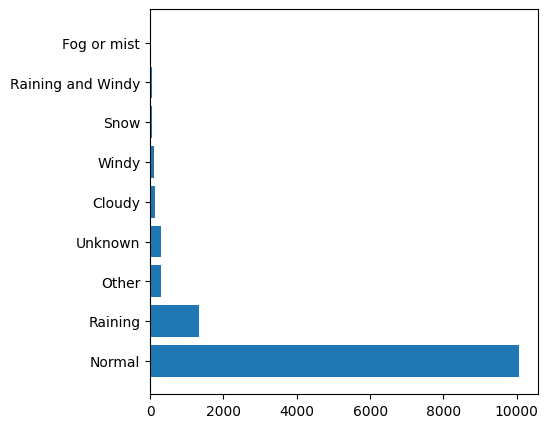

In [70]:
plt.figure(figsize=(5, 5))
plt.barh(df['Weather_conditions'].value_counts().index, df['Weather_conditions'].value_counts().values)
plt.show()



In [72]:
print(df.columns)

Index(['Time', 'Sex_of_driver', 'Educational_level', 'Vehicle_driver_relation',
       'Driving_experience', 'Type_of_vehicle', 'Owner_of_vehicle',
       'Area_accident_occured', 'Lanes_or_Medians', 'Road_allignment',
       'Types_of_Junction', 'Road_surface_type', 'Road_surface_conditions',
       'Light_conditions', 'Weather_conditions', 'Type_of_collision',
       'Number_of_vehicles_involved', 'Number_of_casualties',
       'Vehicle_movement', 'Casualty_class', 'Sex_of_casualty',
       'Age_band_of_casualty', 'Casualty_severity', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity', 'Day_of_week_Friday',
       'Day_of_week_Monday', 'Day_of_week_Saturday', 'Day_of_week_Sunday',
       'Day_of_week_Thursday', 'Day_of_week_Tuesday', 'Day_of_week_Wednesday',
       'Age_band_of_driver_18-30', 'Age_band_of_driver_31-50',
       'Age_band_of_driver_Over 51', 'Age_band_of_driver_Under 18',
       'Age_band_of_driver_Unknown'],
      dtype='object')


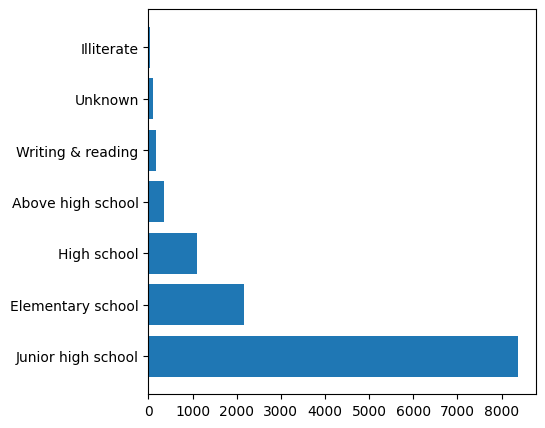

In [73]:
plt.figure(figsize=(5, 5))
plt.barh(df['Educational_level'].value_counts().index, df['Educational_level'].value_counts().values)
plt.show()

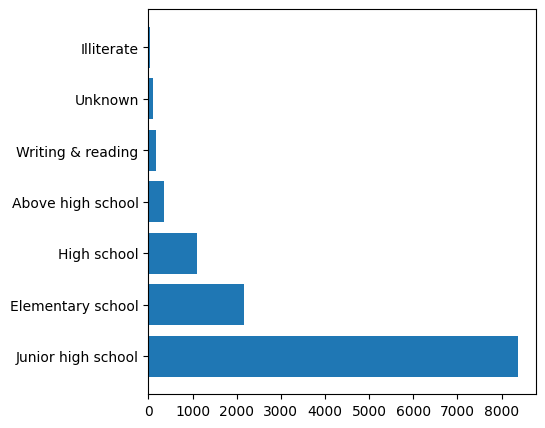

In [75]:
plt.figure(figsize=(5, 5))
plt.barh(df['Educational_level'].value_counts().index, df['Educational_level'].value_counts().values)
plt.show()


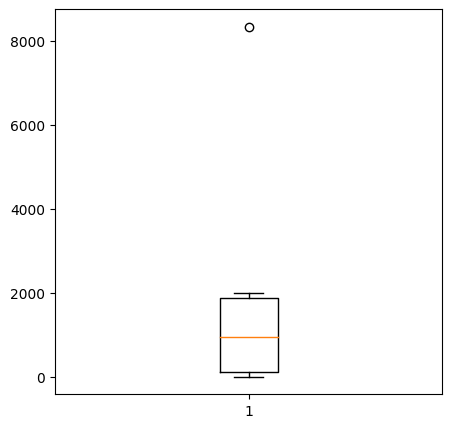

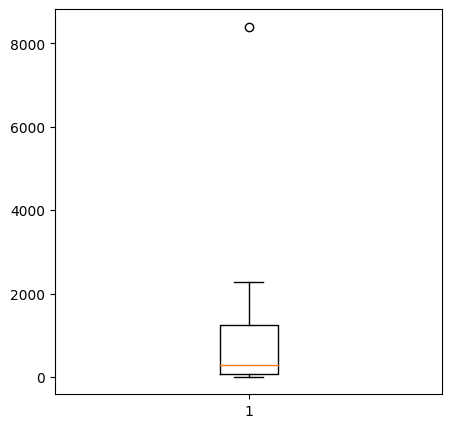

In [74]:
plt.figure(figsize=(5, 5))
plt.boxplot(df['Number_of_vehicles_involved'].value_counts())
plt.show()

plt.figure(figsize=(5, 5))
plt.boxplot(df['Number_of_casualties'].value_counts())
plt.show()

,Time,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,...,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday,Age_band_of_driver_18-30,Age_band_of_driver_31-50,Age_band_of_driver_Over 51,Age_band_of_driver_Under 18,Age_band_of_driver_Unknown
Time,1.000000,-0.021671,-0.022084,0.008455,-0.011945,0.009621,-0.007531,-0.023034,0.000216,0.001856,...,-0.059221,-0.089460,0.037318,0.021660,0.034620,0.037216,-0.008535,-0.064710,0.006591,0.019086
Sex_of_driver,-0.021671,1.000000,0.004967,0.011035,0.009855,-0.003757,-0.009489,-0.000274,-0.012529,-0.002238,...,-0.014629,-0.006371,0.022055,-0.007755,0.010480,0.124424,0.131116,0.054522,0.048065,-0.456204
Educational_level,-0.022084,0.004967,1.000000,-0.076866,0.057625,0.005447,-0.012486,-0.006854,-0.002756,-0.010213,...,-0.001588,0.003563,-0.012625,0.006499,-0.003239,-0.002612,-0.008044,-0.005028,0.005991,0.015738
Vehicle_driver_relation,0.008455,0.011035,-0.076866,1.000000,0.016686,-0.003481,0.014860,0.021997,0.004656,-0.013660,...,-0.019246,-0.011386,-0.015892,0.024098,0.004246,-0.007739,0.014836,0.006521,-0.011119,-0.008165
Driving_experience,-0.011945,0.009855,0.057625,0.016686,1.000000,0.014333,0.000144,-0.000290,-0.010444,-0.015602,...,0.006673,-0.021790,-0.003097,0.015653,-0.012063,0.021022,-0.006979,-0.019384,0.003001,-0.002952
Type_of_vehicle,0.009621,-0.003757,0.005447,-0.003481,0.014333,1.000000,-0.012463,-0.007631,-0.020156,-0.020910,...,0.000721,-0.016710,0.005107,0.001952,0.001019,-0.008500,0.005642,0.001702,0.002442,0.000627
Owner_of_vehicle,-0.007531,-0.009489,-0.012486,0.014860,0.000144,-0.012463,1.000000,-0.021942,0.045938,0.011427,...,-0.005454,-0.011157,-0.021889,0.019428,0.007549,-0.014573,0.017826,-0.005512,-0.003897,0.004110
Area_accident_occured,-0.023034,-0.000274,-0.006854,0.021997,-0.000290,-0.007631,-0.021942,1.000000,0.022760,-0.025859,...,-0.003371,0.008548,-0.008286,0.004918,0.000597,-0.012162,0.003405,-0.001522,0.016083,0.002034
Lanes_or_Medians,0.000216,-0.012529,-0.002756,0.004656,-0.010444,-0.020156,0.045938,0.022760,1.000000,0.042815,...,-0.001558,-0.004507,0.003255,0.000307,-0.007430,-0.004821,0.001275,-0.006297,0.002638,0.009483
Road_allignment,0.001856,-0.002238,-0.010213,-0.013660,-0.015602,-0.020910,0.011427,-0.025859,0.042815,1.000000,...,-0.013288,0.003764,0.006644,-0.021602,0.005458,-0.005937,0.008923,0.002365,-0.014147,0.004129


,Time,Sex_of_driver,Vehicle_driver_relation,Number_of_vehicles_involved,Number_of_casualties,Day_of_week_Friday,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday,Age_band_of_driver_18-30,Age_band_of_driver_31-50,Age_band_of_driver_Over 51,Age_band_of_driver_Under 18,Age_band_of_driver_Unknown
Time,1.000000,-0.021671,0.008455,-0.008687,-0.052321,0.038423,0.004866,-0.059221,-0.089460,0.037318,0.021660,0.034620,0.037216,-0.008535,-0.064710,0.006591,0.019086
Sex_of_driver,-0.021671,1.000000,0.011035,-0.042337,0.048503,0.004695,-0.010416,-0.014629,-0.006371,0.022055,-0.007755,0.010480,0.124424,0.131116,0.054522,0.048065,-0.456204
Vehicle_driver_relation,0.008455,0.011035,1.000000,0.008868,0.018222,0.009640,0.006985,-0.019246,-0.011386,-0.015892,0.024098,0.004246,-0.007739,0.014836,0.006521,-0.011119,-0.008165
Number_of_vehicles_involved,-0.008687,-0.042337,0.008868,1.000000,0.213427,-0.004130,-0.003908,0.014211,0.007033,-0.015932,0.016466,-0.012186,0.014678,-0.020342,-0.005096,-0.001207,0.013879
Number_of_casualties,-0.052321,0.048503,0.018222,0.213427,1.000000,-0.003420,-0.007383,0.039315,0.108232,-0.032627,-0.034983,-0.058256,0.018100,0.012107,0.017138,0.039271,-0.090113
Day_of_week_Friday,0.038423,0.004695,0.009640,-0.004130,-0.003420,1.000000,-0.177193,-0.176276,-0.163889,-0.187441,-0.182588,-0.186785,-0.016878,0.034180,-0.005651,-0.019844,-0.003645
Day_of_week_Monday,0.004866,-0.010416,0.006985,-0.003908,-0.007383,-0.177193,1.000000,-0.157245,-0.146196,-0.167205,-0.162876,-0.166620,0.017917,-0.014481,0.001882,-0.007193,-0.001630
Day_of_week_Saturday,-0.059221,-0.014629,-0.019246,0.014211,0.039315,-0.176276,-0.157245,1.000000,-0.145440,-0.166340,-0.162034,-0.165758,0.025567,-0.029672,-0.001705,-0.005317,0.011172
Day_of_week_Sunday,-0.089460,-0.006371,-0.011386,0.007033,0.108232,-0.163889,-0.146196,-0.145440,1.000000,-0.154651,-0.150648,-0.154110,-0.003019,-0.004693,0.012879,0.016776,-0.014660
Day_of_week_Thursday,0.037318,0.022055,-0.015892,-0.015932,-0.032627,-0.187441,-0.167205,-0.166340,-0.154651,1.000000,-0.172296,-0.176256,0.009596,0.005672,-0.006251,0.003643,-0.018268


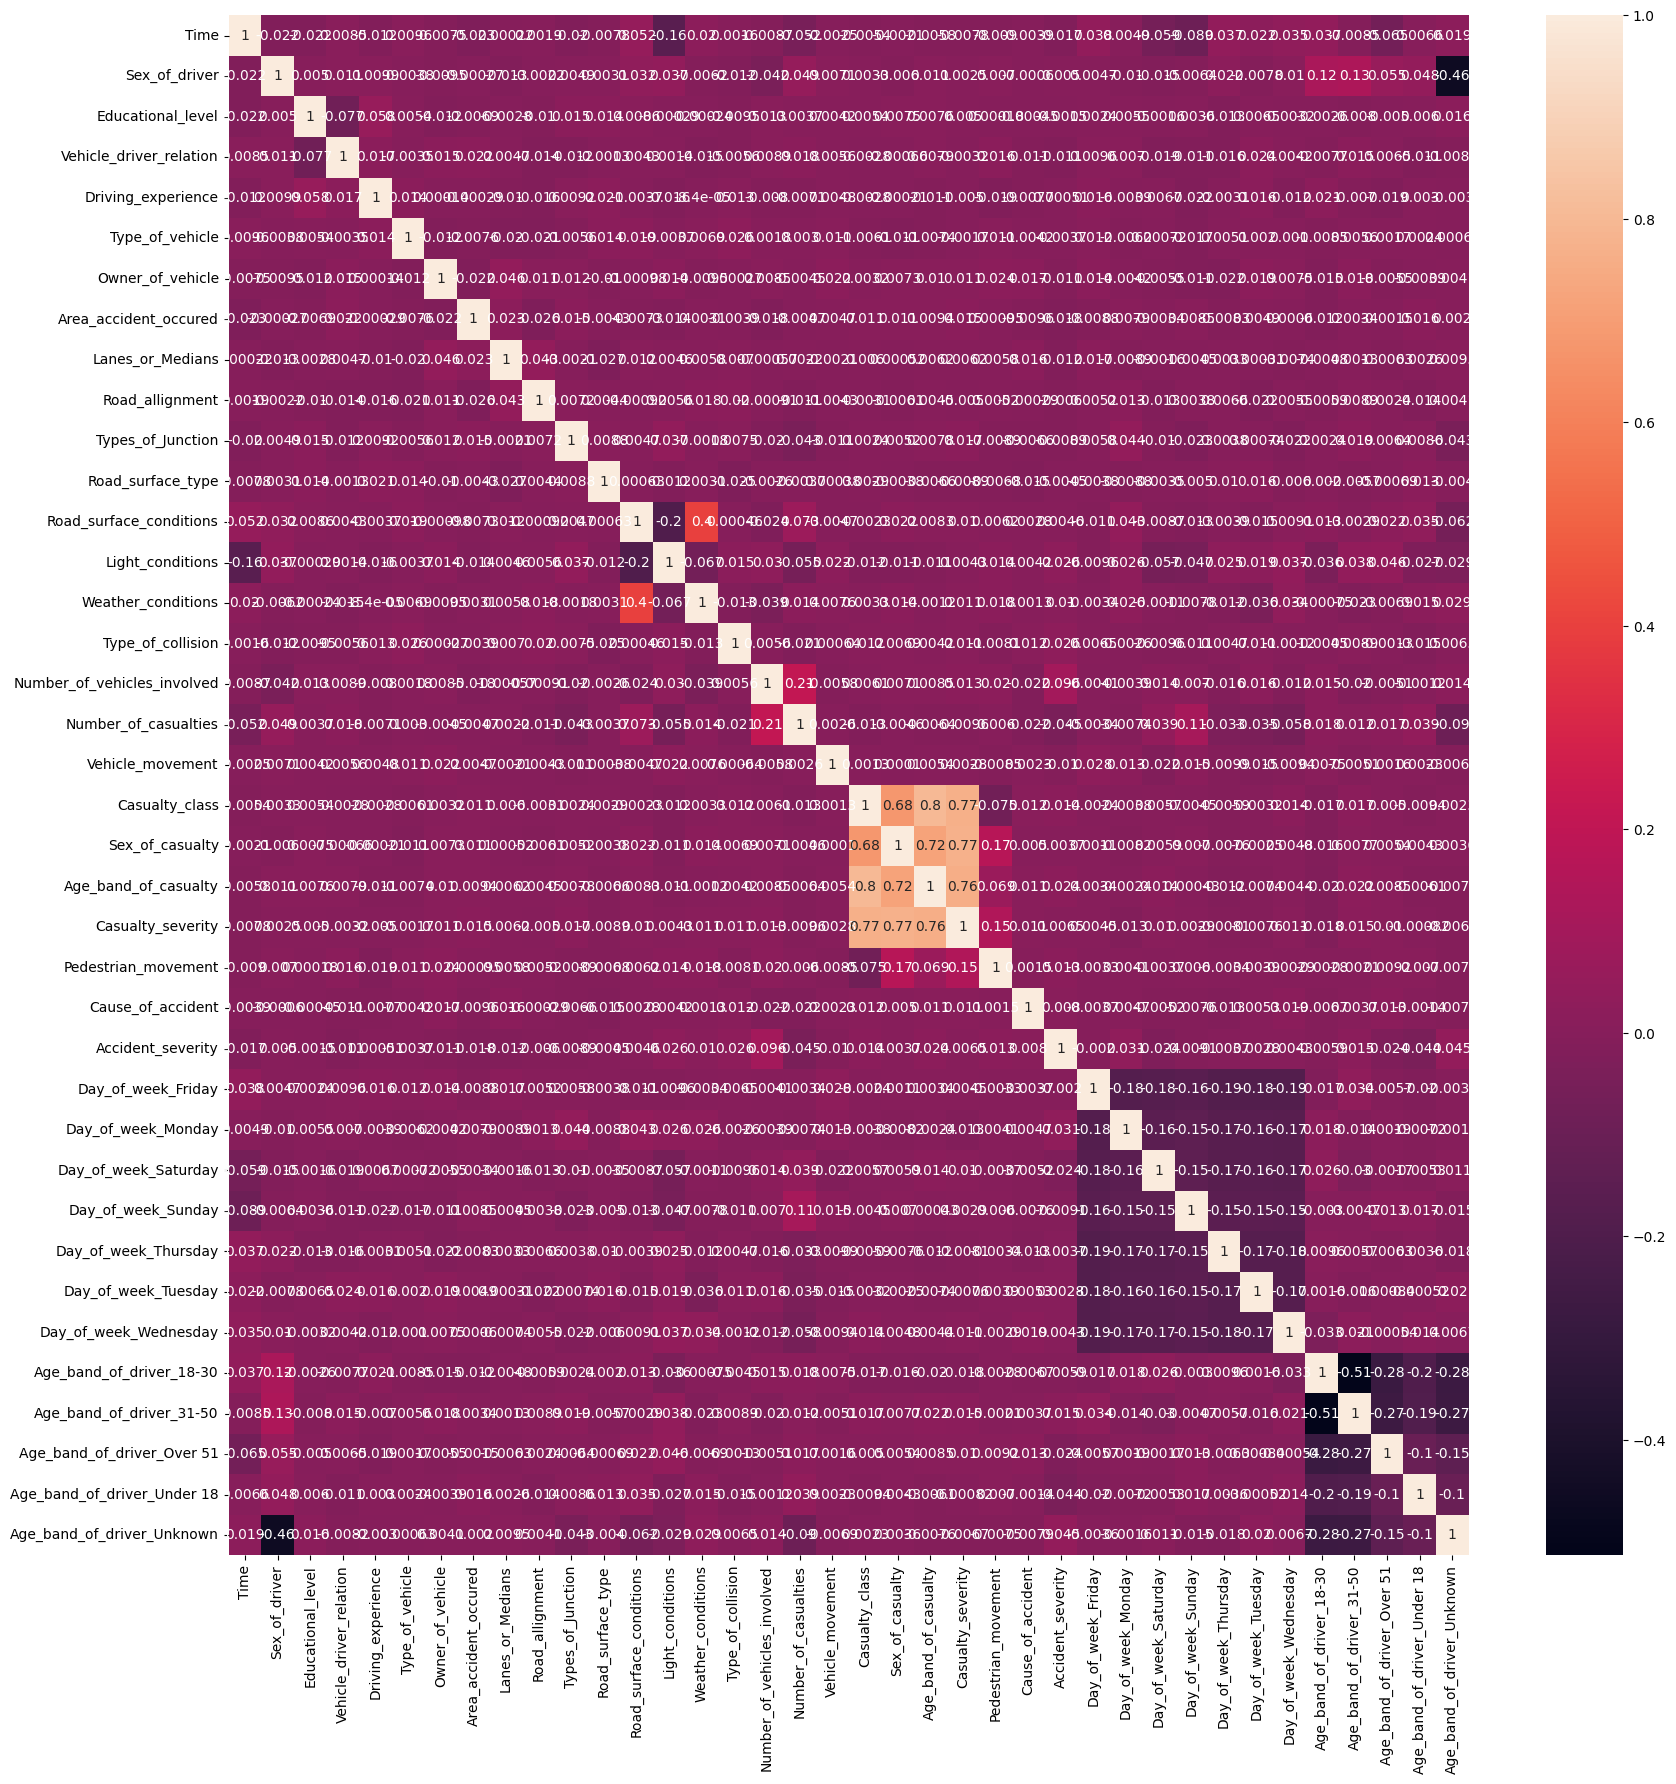

In [79]:
Encoded_df = df.copy()
for i in Encoded_df.select_dtypes(include='object').columns:
 le = LabelEncoder()
 Encoded_df[i] = le.fit_transform(Encoded_df[i])

 display(Encoded_df.corr())

display(df.select_dtypes(exclude='object').corr())

plt.figure(figsize=(20, 20))
sns.heatmap(Encoded_df.corr(), annot=True)
plt.show()

## Feature Selection
- Choose features that you believe will most influence the outcome based on your analysis and the insights from your visualizations. Focus on those that appear most impactful to include in your modeling.

## Train-Test Split
* Divide the dataset into training and testing sets to evaluate the performance of your models.

In [84]:
X = df.drop(['Educational_level'], axis=1)
y = df['Educational_level']

In [87]:
numeric_features = ['Day_of_week_Friday ',
   'Day_of_week_Monday',
   'Day_of_week_Saturday',
   'Day_of_week_Sunday',
   'Day_of_week_Thursday',
 ' Day_of_week_Tuesday' ]
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

categorical_features = [ 'Driving_experience',
   'Type_of_vehicle',
    'Owner_of_vehicle',
   'Area_accident_occured',
    'Lanes_or_Medians',
   'Road_allignment',
   'Types_of_Junction',
   'Road_surface_type ',
   'Road_surface_conditions',
   'Light_conditions ',
'Weather_conditions',
   'Type_of_collision' ]

categorical_transformer = Pipeline(
    steps=[
        ("encoder", OneHotEncoder(handle_unknown="ignore")),
        ("selector", SelectPercentile(chi2, percentile=50)),
    ]
)
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

## Modeling

Once the data is split into training and testing sets, the next step is to build models to make predictions. Here, we will explore several machine learning algorithms, each with its unique characteristics and suitability for different types of data and problems. You will implement the following models:

### 1. Logistic Regression

### 2. Decision Tree Classifier

### 3. Support Vector Machine (SVM)

### 4. K-Neighbors Classifier

### Implementing the Models
- For each model, use the training data you have prepared to train the model.

#### Logistic Regression

#### Decision Tree Classifier

#### Support Vector Machine (SVM)

#### K-Neighbors Classifier

## Model Evaluation

After training your models, it's crucial to evaluate their performance to understand their effectiveness and limitations. This section outlines various techniques and metrics to assess the performance of each model you have implemented.

### Evaluation Techniques
1. **Confusion Matrix**

2. **Accuracy**

3. **Precision and Recall**

4. **F1 Score**

5. **ROC Curve and AUC**

### Implementing Evaluation
- Calculate the metrics listed above using your test data.

## Project Questions:

### Comparative Analysis

- **Compare Metrics**: Examine the performance metrics (such as accuracy, precision, and recall) of each model. Document your observations on which model performs best for your dataset and the problem you're addressing.
- **Evaluate Trade-offs**: Discuss the trade-offs you encountered when choosing between models. Consider factors like computational efficiency, ease of implementation, and model interpretability.
- **Justify Your Choice**: After comparing and evaluating, explain why you believe one model is the best choice. Provide a clear rationale based on the performance metrics and trade-offs discussed.
- **Feature Importance**: Identify and discuss the most important features for the best-performing model. How do these features impact the predictions? Use the visualizations you have created to justify your answer if necessary.
- **Model Limitations**: Discuss any limitations you encountered with the models you used. Are there any aspects of the data or the problem that these models do not handle well?
- **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. This could include trying different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here: